In [75]:
import numpy as np
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from plotnine import stat_function, geom_point, ggtitle,ggplot, aes, geom_line, scale_y_continuous, labs, scale_x_date, theme_bw, theme, scale_color_manual

In [30]:
#load in the data
equity_etf = pd.read_csv('Data/IVV.csv')
gold_etf = pd.read_csv('Data/GLD.csv')
bitcoin = pd.read_csv('Data/BTC-USD.csv')
#Convert the data into the datetime format and make it the index to query the dataframe easier.
gold_etf["Date"] = pd.to_datetime(gold_etf["Date"], format="%Y-%m-%d")
gold_etf.set_index("Date", inplace=True)
equity_etf["Date"] = pd.to_datetime(equity_etf["Date"], format="%Y-%m-%d")
equity_etf.set_index("Date", inplace=True)
bitcoin["Date"] = pd.to_datetime(bitcoin["Date"], format="%Y-%m-%d")
bitcoin.set_index("Date", inplace=True)

<AxesSubplot:title={'center':'Gold Returns'}, xlabel='Date'>

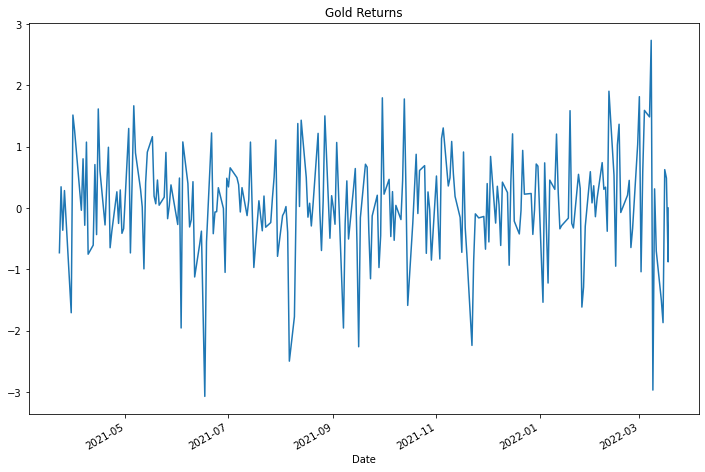

In [31]:
gold_returns = 100 * gold_etf['Adj Close'].pct_change().dropna()
equity_returns = 100 * equity_etf['Adj Close'].pct_change().dropna()
bitcoin_returns = 100 *bitcoin['Adj Close'].pct_change().dropna()
gold_returns.plot(figsize=(12,8),title='Gold Returns')

<AxesSubplot:title={'center':'Equity Returns'}, xlabel='Date'>

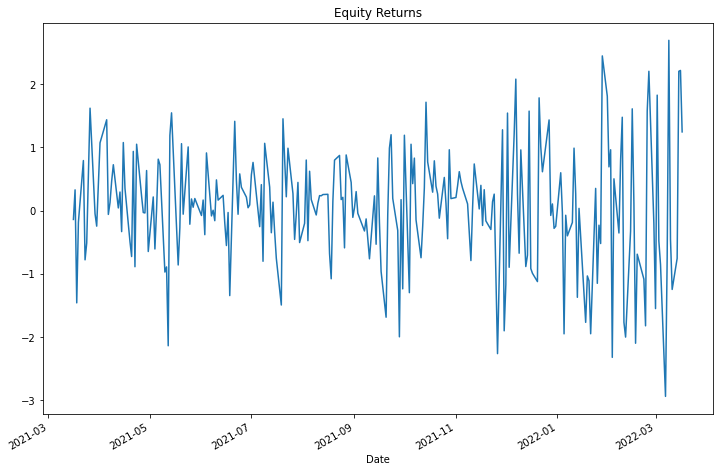

In [32]:
equity_returns.plot(figsize=(12,8),title='Equity Returns')

<AxesSubplot:title={'center':'Bitcoin Returns'}, xlabel='Date'>

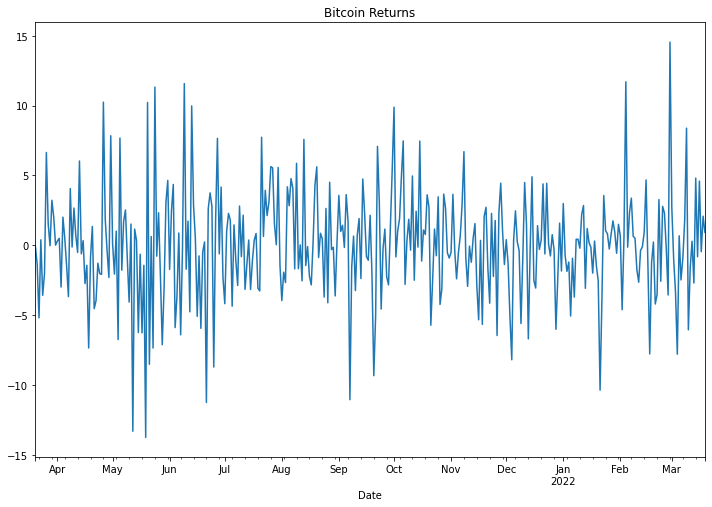

In [33]:
bitcoin_returns.plot(figsize=(12,8),title='Bitcoin Returns')

# Box Jenkins Method

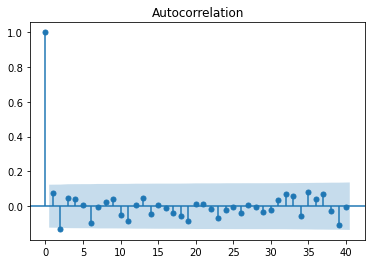

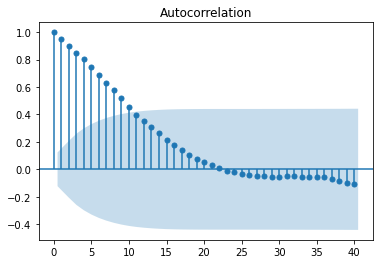

In [79]:
#ACF
from statsmodels.graphics.tsaplots import  plot_acf, plot_pacf
acf_plot = plot_acf(gold_returns, lags = 40)
acf_plot = plot_acf(gold_etf['Adj Close'], lags =40)

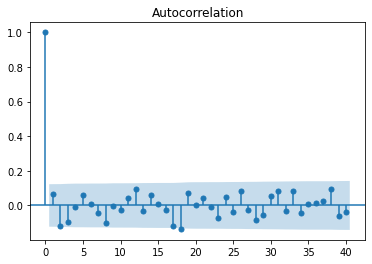

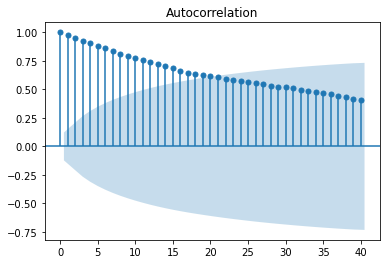

In [80]:
acf_plot = plot_acf(equity_returns, lags = 40)
acf_plot = plot_acf(equity_etf['Adj Close'], lags = 40)

# 

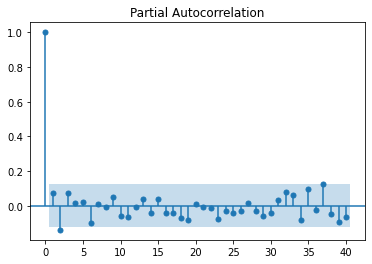

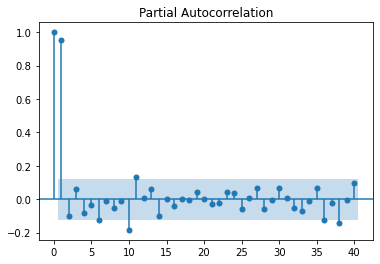

In [87]:
# PACF
plot_pacf(gold_returns, lags=40)
plot_pacf(gold_etf['Adj Close'], lags = 40)
plt.show()

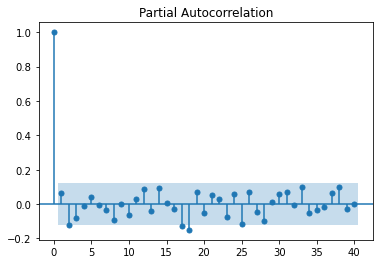

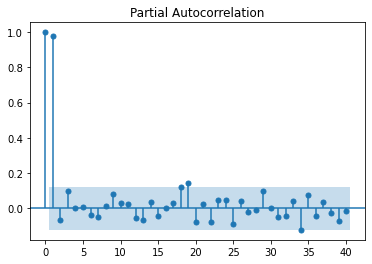

In [90]:
# PACF
plot_pacf(equity_returns, lags=40)
plot_pacf(equity_etf['Adj Close'], lags = 40)
plt.show()

# 

## Modeling Prices
To select the best paramaterers for ARIMA models, we should first check for stationarity.

In [34]:
from statsmodels.tsa.stattools import adfuller
print('Gold ETF :')
gold_adf_test= adfuller(gold_returns)
print('ADF Statistic: {:.6f}'.format(gold_adf_test[0]))
print('p-value: {:.6f}'.format(gold_adf_test[1]))
print('critical Value: {}'.format(gold_adf_test[4]))

print('=================================================================================')

print('Equity ETF :')
equity_adf_test= adfuller(equity_returns)
print('ADF Statistic: {:.6f}'.format(equity_adf_test[0]))
print('p-value: {:.6f}'.format(equity_adf_test[1]))
print('critical Value: {}'.format(equity_adf_test[4]))

print('=================================================================================')

print('Bitcoin :')
bitcoin_adf_test= adfuller(bitcoin_returns)
print('ADF Statistic: {:.6f}'.format(bitcoin_adf_test[0]))
print('p-value: {:.6f}'.format(bitcoin_adf_test[1]))
print('critical Value: {}'.format(bitcoin_adf_test[4]))

Gold ETF :
ADF Statistic: -12.281595
p-value: 0.000000
critical Value: {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}
Equity ETF :
ADF Statistic: -10.269826
p-value: 0.000000
critical Value: {'1%': -3.4565688966099373, '5%': -2.8730786194395455, '10%': -2.5729189953388762}
Bitcoin :
ADF Statistic: -20.070764
p-value: 0.000000
critical Value: {'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}


# 

We now use auto-arima to get the best model parameters. The pyramid arima package selects the best model by choosing the one with the lowest AIC value.

In [35]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [36]:
arimamodel(gold_returns).summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=635.917, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=639.401, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=640.042, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=639.511, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=637.996, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=637.639, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=637.540, Time=0.37 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=636.486, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=637.198, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=639.415, Time=0.89 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=634.436, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=637.996, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=638.548, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=636.204, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=636.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -314.218
Date:                Mon, 21 Mar 2022   AIC                            634.436
Time:                        19:52:49   BIC                            645.025
Sample:                             0   HQIC                           638.697
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7371      0.121     -6.097      0.000      -0.974      -0.500
ma.L1          0.8559      0.097      8.806      0.000       0.665       1.046
sigma2         0.7085      0.049     14.369      0.000       0.612       0.805
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                31.87
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                            -0.53
Prob(H) (two-sided):                  0.19   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
arimamodel(equity_returns).summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=690.164, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=688.615, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=689.476, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=689.144, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=687.401, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.732 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  255
Model:                        SARIMAX   Log Likelihood                -342.700
Date:                Mon, 21 Mar 2022   AIC                            687.401
Time:                        19:52:50   BIC                            690.942
Sample:                             0   HQIC                           688.825
                                - 255                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.8607      0.069     12.478      0.000       0.725       0.996
===================================================================================
Ljung-Box (L1) (Q):                   1.15   Jarque-Bera (JB):                 3.55
Prob(Q):                              0.28   Prob(JB):                         0.17
Heteroskedasticity (H):               3.33   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
arimamodel(bitcoin_returns).summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2030.165, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2027.450, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2028.408, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2028.350, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2025.455, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.660 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:                        SARIMAX   Log Likelihood               -1011.728
Date:                Mon, 21 Mar 2022   AIC                           2025.455
Time:                        19:52:51   BIC                           2029.355
Sample:                             0   HQIC                          2027.005
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        14.9668      0.828     18.079      0.000      13.344      16.589
===================================================================================
Ljung-Box (L1) (Q):                   1.05   Jarque-Bera (JB):                38.28
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 

 we choose the following parameters and implement ARIMA models for each time series.

In [39]:
import statsmodels.api as sm

def arma_model(data, order):
    process_data = data.values.reshape(-1)
    arma_data = sm.tsa.ARIMA(process_data, list(order)).fit()
    return arma_data

#run an ARMA model with your choice of parameters.
arma_gold = arma_model(gold_returns, (1,0,1))
arma_equity = arma_model(equity_returns, (0,0,0))
arma_bitcoin = arma_model(equity_returns, (0,0,0))

print(arma_gold.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  252
Model:                     ARMA(1, 1)   Log Likelihood                -313.959
Method:                       css-mle   S.D. of innovations              0.841
Date:                Mon, 21 Mar 2022   AIC                            635.917
Time:                        19:52:51   BIC                            650.035
Sample:                             0   HQIC                           641.598
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0408      0.057      0.721      0.471      -0.070       0.152
ar.L1.y       -0.7394      0.180     -4.111      0.000      -1.092      -0.387
ma.L1.y        0.8572      0.143      6.002      0.0

In [40]:
print(arma_equity.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  255
Model:                     ARMA(0, 0)   Log Likelihood                -342.308
Method:                           css   S.D. of innovations              0.926
Date:                Mon, 21 Mar 2022   AIC                            688.615
Time:                        19:52:51   BIC                            695.698
Sample:                             0   HQIC                           691.464
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0515      0.058      0.887      0.375      -0.062       0.165


In [41]:
print(arma_bitcoin.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  255
Model:                     ARMA(0, 0)   Log Likelihood                -342.308
Method:                           css   S.D. of innovations              0.926
Date:                Mon, 21 Mar 2022   AIC                            688.615
Time:                        19:52:52   BIC                            695.698
Sample:                             0   HQIC                           691.464
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0515      0.058      0.887      0.375      -0.062       0.165


In [67]:
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model

gold_arima = ARIMA(gold_returns, order=(1,0,1))
equity_arima = ARIMA(equity_returns, order=(0,0,0))

#fit the models
gold =gold_arima.fit()
equity = equity_arima.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.


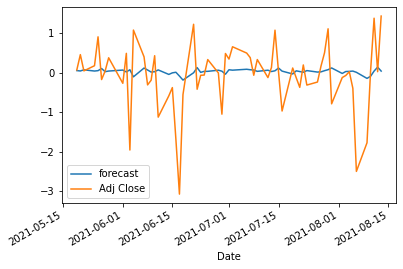

In [65]:
gold.plot_predict(40,100);

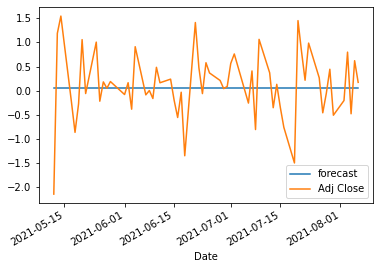

In [72]:
equity.plot_predict(40,100);

In [107]:
from arch import arch_model
gold_arch= arch_model(gold_returns, vol='ARCH')
model = gold_arch.fit()
model.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 6003.066246736225
Iteration:      2,   Func. Count:     12,   Neg. LLF: 318.0596890174301
Iteration:      3,   Func. Count:     18,   Neg. LLF: 489.0793149913564
Iteration:      4,   Func. Count:     25,   Neg. LLF: 310.8802223345145
Iteration:      5,   Func. Count:     28,   Neg. LLF: 310.8802223345101
Optimization terminated successfully    (Exit mode 0)
            Current function value: 310.8802223345145
            Iterations: 5
            Function evaluations: 28
            Gradient evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -310.880
Distribution:                  Normal   AIC:                           627.760
Method:            Maximum Likelihood   BIC:                           638.349
                                        No. Observations:                  252
Date:                Mon, Mar 21 2022   Df Residuals:                      251
Time:                        19:41:14   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0683  4.887e-02      1.398      0.162 [-2.748e-02,  0.164]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.5558  7.251e-02      7.664  1.795e-14   [  0.414,  0.698]
alpha[1]       0.2387      0.115      2.078  3.771e-02 [1.355e-02,  0.464]
==========================================================================

Covariance estimator: robust
"""

<AxesSubplot:xlabel='Date'>

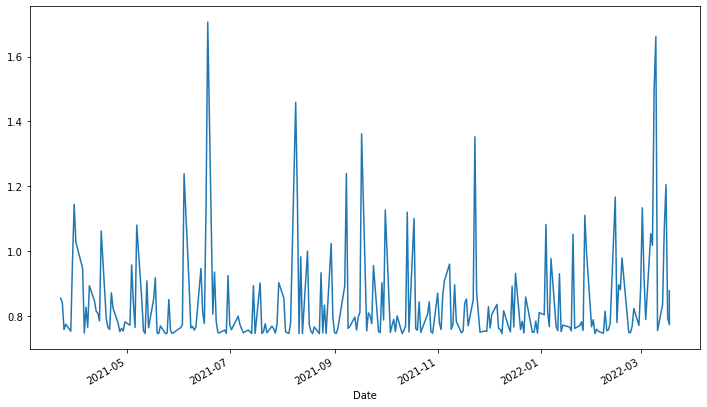

In [110]:

model.conditional_volatility.plot(figsize=(12,7))

In [120]:
equity_arch= arch_model(equity_returns, vol='ARCH')
model = equity_arch.fit()
model.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 895.0863164302192
Iteration:      2,   Func. Count:     12,   Neg. LLF: 438.03573669308685
Iteration:      3,   Func. Count:     18,   Neg. LLF: 357.48033001610315
Iteration:      4,   Func. Count:     23,   Neg. LLF: 337.31986016366534
Iteration:      5,   Func. Count:     27,   Neg. LLF: 337.3197726580894
Iteration:      6,   Func. Count:     30,   Neg. LLF: 337.3197726579669
Optimization terminated successfully    (Exit mode 0)
            Current function value: 337.3197726580894
            Iterations: 6
            Function evaluations: 30
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -337.320
Distribution:                  Normal   AIC:                           680.640
Method:            Maximum Likelihood   BIC:                           691.263
                                        No. Observations:                  255
Date:                Mon, Mar 21 2022   Df Residuals:                      254
Time:                        19:50:13   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0753  5.763e-02      1.306      0.191 [-3.768e-02,  0.188]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.6027      0.119      5.076  3.851e-07    [  0.370,  0.835]
alpha[1]       0.3508      0.179      1.960  5.005e-02 [-8.108e-05,  0.702]
===========================================================================

Covariance estimator: robust
"""

<AxesSubplot:xlabel='Date'>

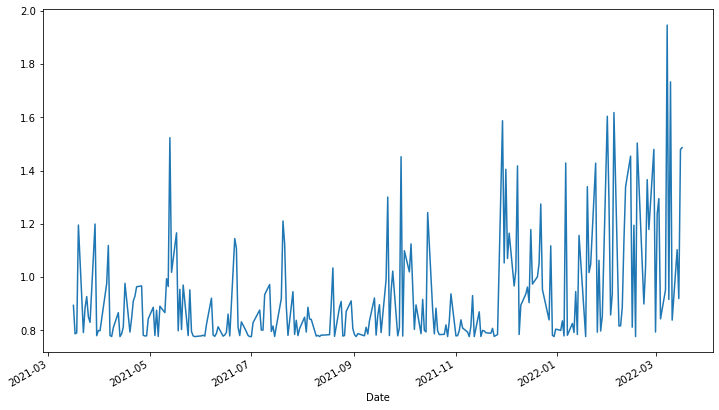

In [129]:
model.conditional_volatility.plot(figsize=(12,7))